# [통계적 기계학습] - 12201639 임소휘
---
- 고객 이탈 데이터셋(churn.csv)을 활용하여 데이터 분석 실시
- 적절한 변수 선정하여 로지스틱 회귀 모형 적합
- 결과 해석

- Churn.csv : 변수 21개, 관측치 3,333개 / 반응변수 'Churn


## Dataset
---
고객 이탈 데이터셋(Churn.csv)은 변수 21개 및 관측치 3,333개로 이루어져 있고, 각 피처에 대해 반응변수는 Churn(이탈 여부)로 이루어져 있다.

In [59]:
import os
import pandas as pd

CHURN_PATH = './dataset'

def load_churn_data(churn_path=CHURN_PATH):
    csv_path = os.path.join(churn_path, "churn.csv")
    return pd.read_csv(csv_path)

In [60]:
churn = load_churn_data()
churn.head() #head(self, n=5) -> 처음 5행의 데이터만 확인해 봄

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [61]:
churn.info() #데이터에 대한 간략한 설명, 전체 행 수 및 각 피처의 데이터 타입과 null이 아닌 값 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

위 데이터셋을 확인해 보면, 21개의 변수 중에서도 숫자형, 문자형 등 다양한 값을 가짐을 알 수 있다.

In [62]:
churn.describe() #각 피처의 숫자형 특성의 요약 정보를 보여줌

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


각 변수를 히스토그램으로 살펴보면 다음과 같다.

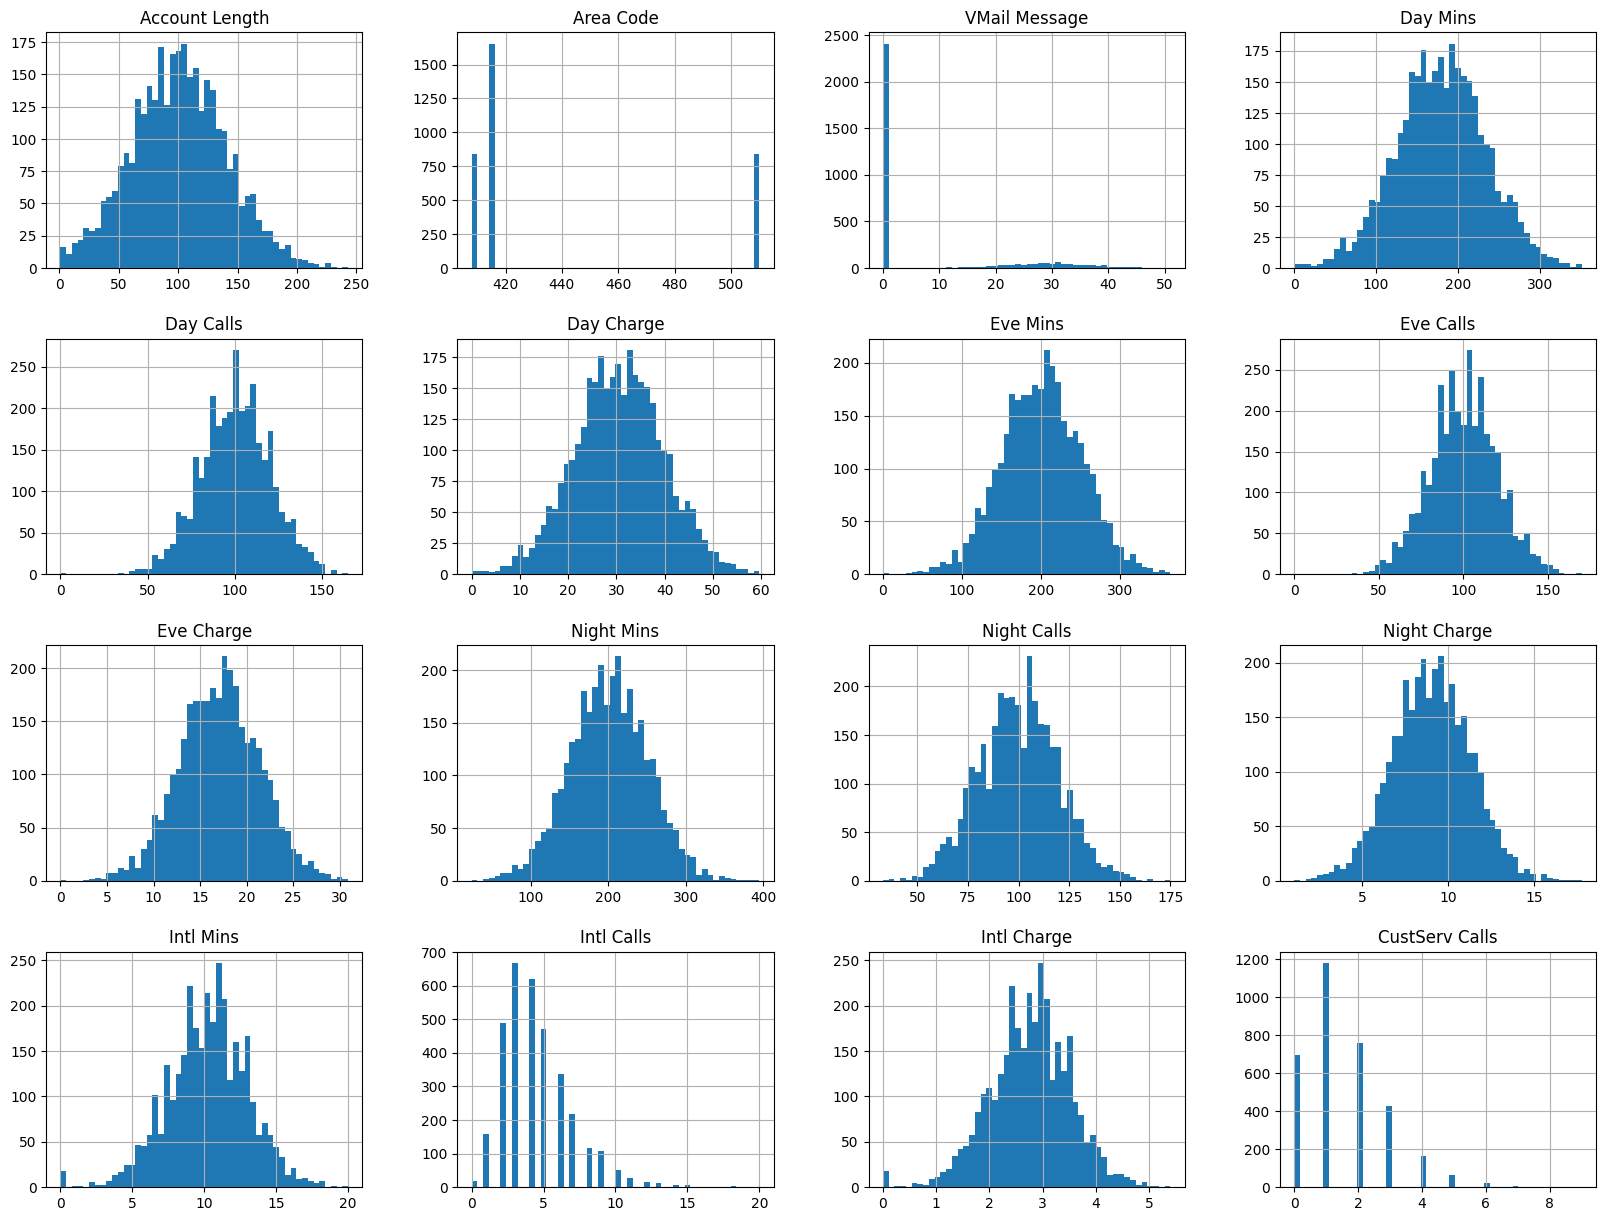

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
churn.hist(bins=50, figsize=(20,15))
plt.show()

## Dataset pre-processing
---
string 형태의 데이터 : State, Phone,Int'l plan, VMail Plan,Churn? 
총 5개 존재.
이때, 기존 지식을 활용하여 고객 이탈 여부 State와 Area Code 변수 간 관계가 존재하고, 큰 범주에 해당하는 Area Code를 변수로 활용하여 String형태인 State 변수를 제거하였다. 또한 사용자의 Phone number는 개인정보에 해당하고, 이탈 여부와 상관관계가 없다고 가정하였다. 따라서 나머지 변수(Int'l plan, VMail Plan, Churn?)만 dummy variable로 변환하였다.

In [64]:
churn = churn.copy() #원본 보호를 위해 copy하여 churn 변수에 저장
# State, Phone 열 삭제
import pandas as pd

churn = churn.drop('State', axis=1)
churn = churn.drop('Phone',axis=1)

#Int'l Plan, VMail Plan, Churn? 피처를 0과 1을 갖는 값으로 변환
intlplan_dict = {'yes': 1, 'no': 0}
vmailplan_dict = {'yes': 1, 'no': 0}
churn_dict = {'True.': 1, 'False.': 0}

churn['Int\'l Plan'] = churn['Int\'l Plan'].map(intlplan_dict)
churn['VMail Plan'] = churn['VMail Plan'].map(vmailplan_dict)
churn['Churn?'] = churn['Churn?'].map(churn_dict)

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Area Code       3333 non-null   int64  
 2   Int'l Plan      3333 non-null   int64  
 3   VMail Plan      3333 non-null   int64  
 4   VMail Message   3333 non-null   int64  
 5   Day Mins        3333 non-null   float64
 6   Day Calls       3333 non-null   int64  
 7   Day Charge      3333 non-null   float64
 8   Eve Mins        3333 non-null   float64
 9   Eve Calls       3333 non-null   int64  
 10  Eve Charge      3333 non-null   float64
 11  Night Mins      3333 non-null   float64
 12  Night Calls     3333 non-null   int64  
 13  Night Charge    3333 non-null   float64
 14  Intl Mins       3333 non-null   float64
 15  Intl Calls      3333 non-null   int64  
 16  Intl Charge     3333 non-null   float64
 17  CustServ Calls  3333 non-null   i

## 변수 간 상관관계 조사
---
데이터셋 feature 간 선형 상관관계를 나타내 보면 다음과 같다. 
이때 값은 -1~+1의 값을 갖고 0에 가까울 수록 두 변수 간의 상관관계가 적다는 것을 의미한다.

In [65]:
corr_matrix = churn.corr()

In [66]:
corr_matrix["Churn?"].sort_values(ascending=False) #선형 관계에 대해서만 알려준다. 따라서 각 변수들에 대해서 선형관계가 작다는 것을 알 수 있다.

Churn?            1.000000
Int'l Plan        0.259852
CustServ Calls    0.208750
Day Mins          0.205151
Day Charge        0.205151
Eve Mins          0.092796
Eve Charge        0.092786
Intl Charge       0.068259
Intl Mins         0.068239
Night Charge      0.035496
Night Mins        0.035493
Day Calls         0.018459
Account Length    0.016541
Eve Calls         0.009233
Area Code         0.006174
Night Calls       0.006141
Intl Calls       -0.052844
VMail Message    -0.089728
VMail Plan       -0.102148
Name: Churn?, dtype: float64

## Scatter Matrix Plot
---
반응변수와 변수 간 선형 상관관계 값이 크지 않으므로 Scatter maxtrix를 plot하여 변수 간 관계를 확인해 볼 수 있다.

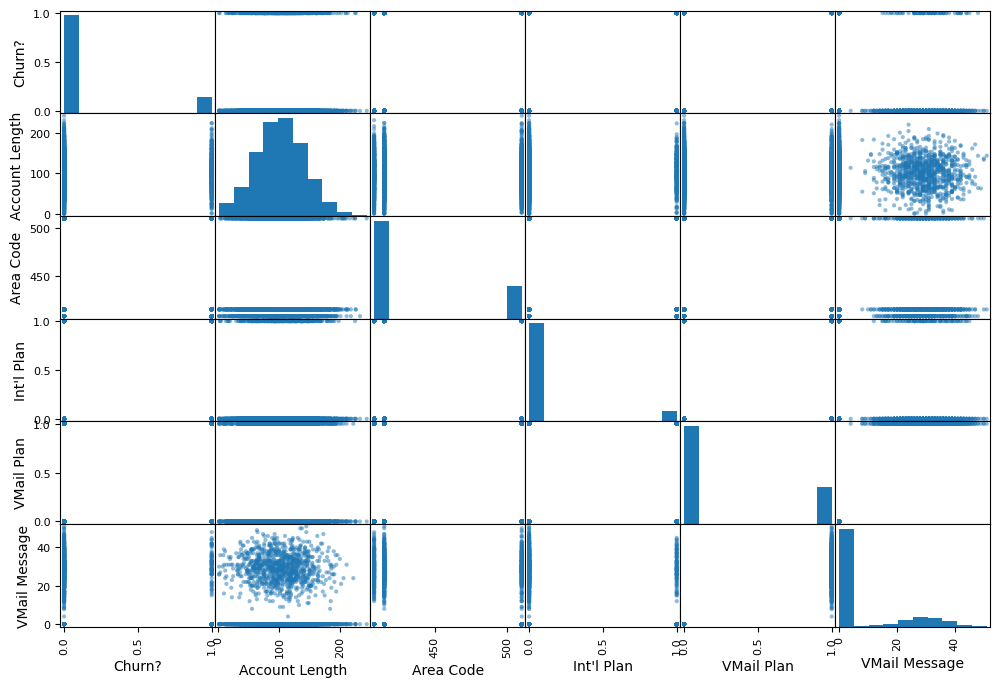

In [67]:
from pandas.plotting import scatter_matrix

attributes = ["Churn?","Account Length","Area Code", "Int\'l Plan", "VMail Plan", "VMail Message"]
scatter_matrix(churn[attributes], figsize=(12,8))
plt.show()
plt.close()

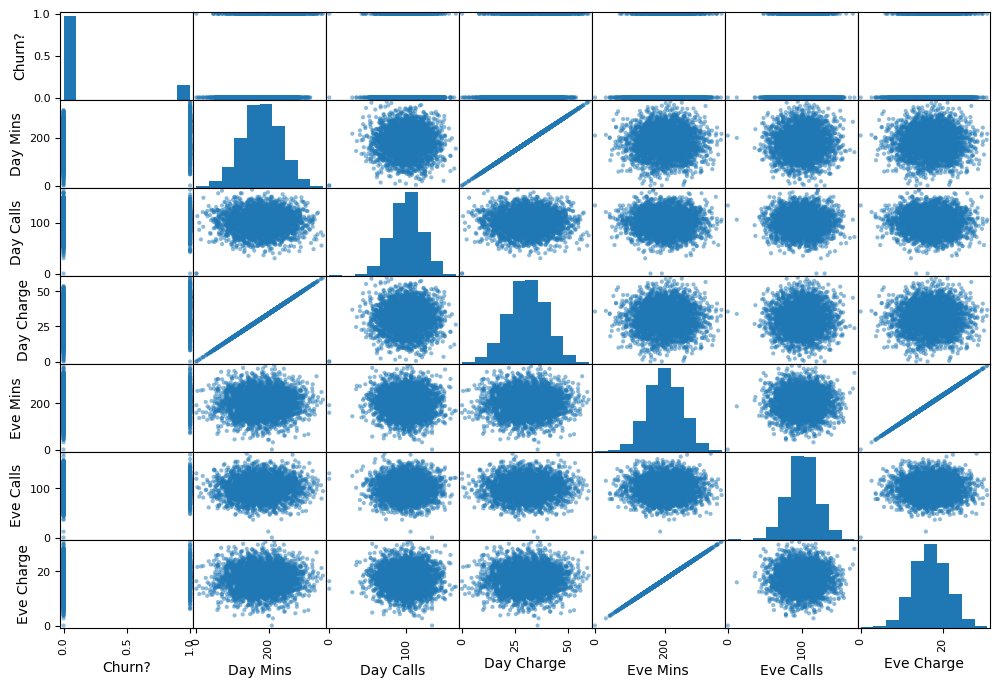

In [68]:
from pandas.plotting import scatter_matrix

attributes = ["Churn?","Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls", "Eve Charge"]
scatter_matrix(churn[attributes], figsize=(12,8))
plt.show()

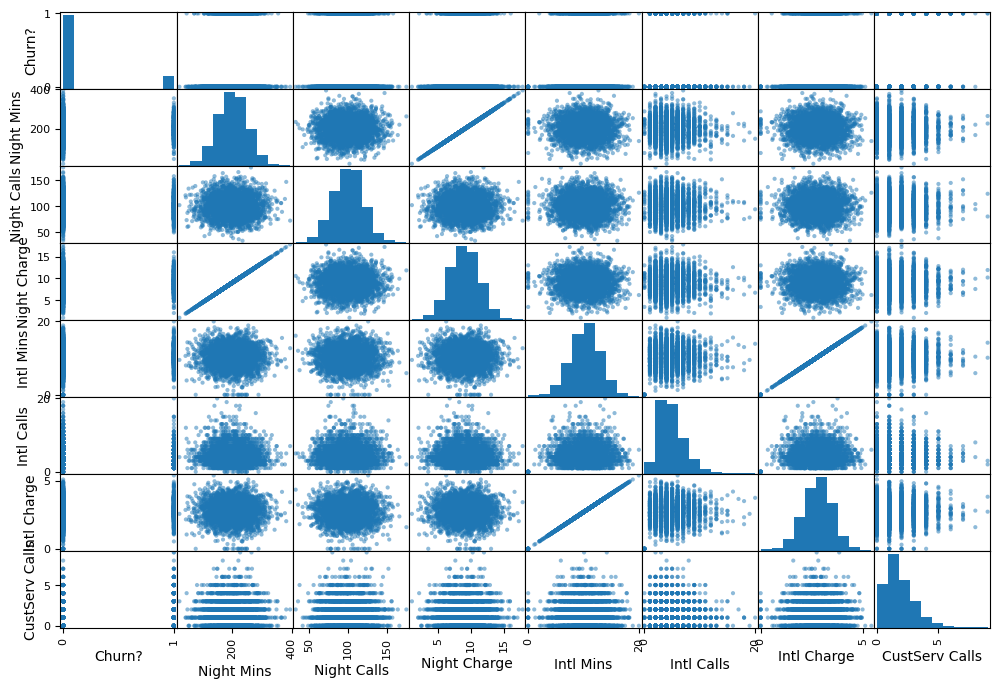

In [69]:
from pandas.plotting import scatter_matrix

attributes = ["Churn?", "Night Mins","Night Calls","Night Charge","Intl Mins","Intl Calls", "Intl Charge", "CustServ Calls"]
scatter_matrix(churn[attributes], figsize=(12,8))
plt.show()

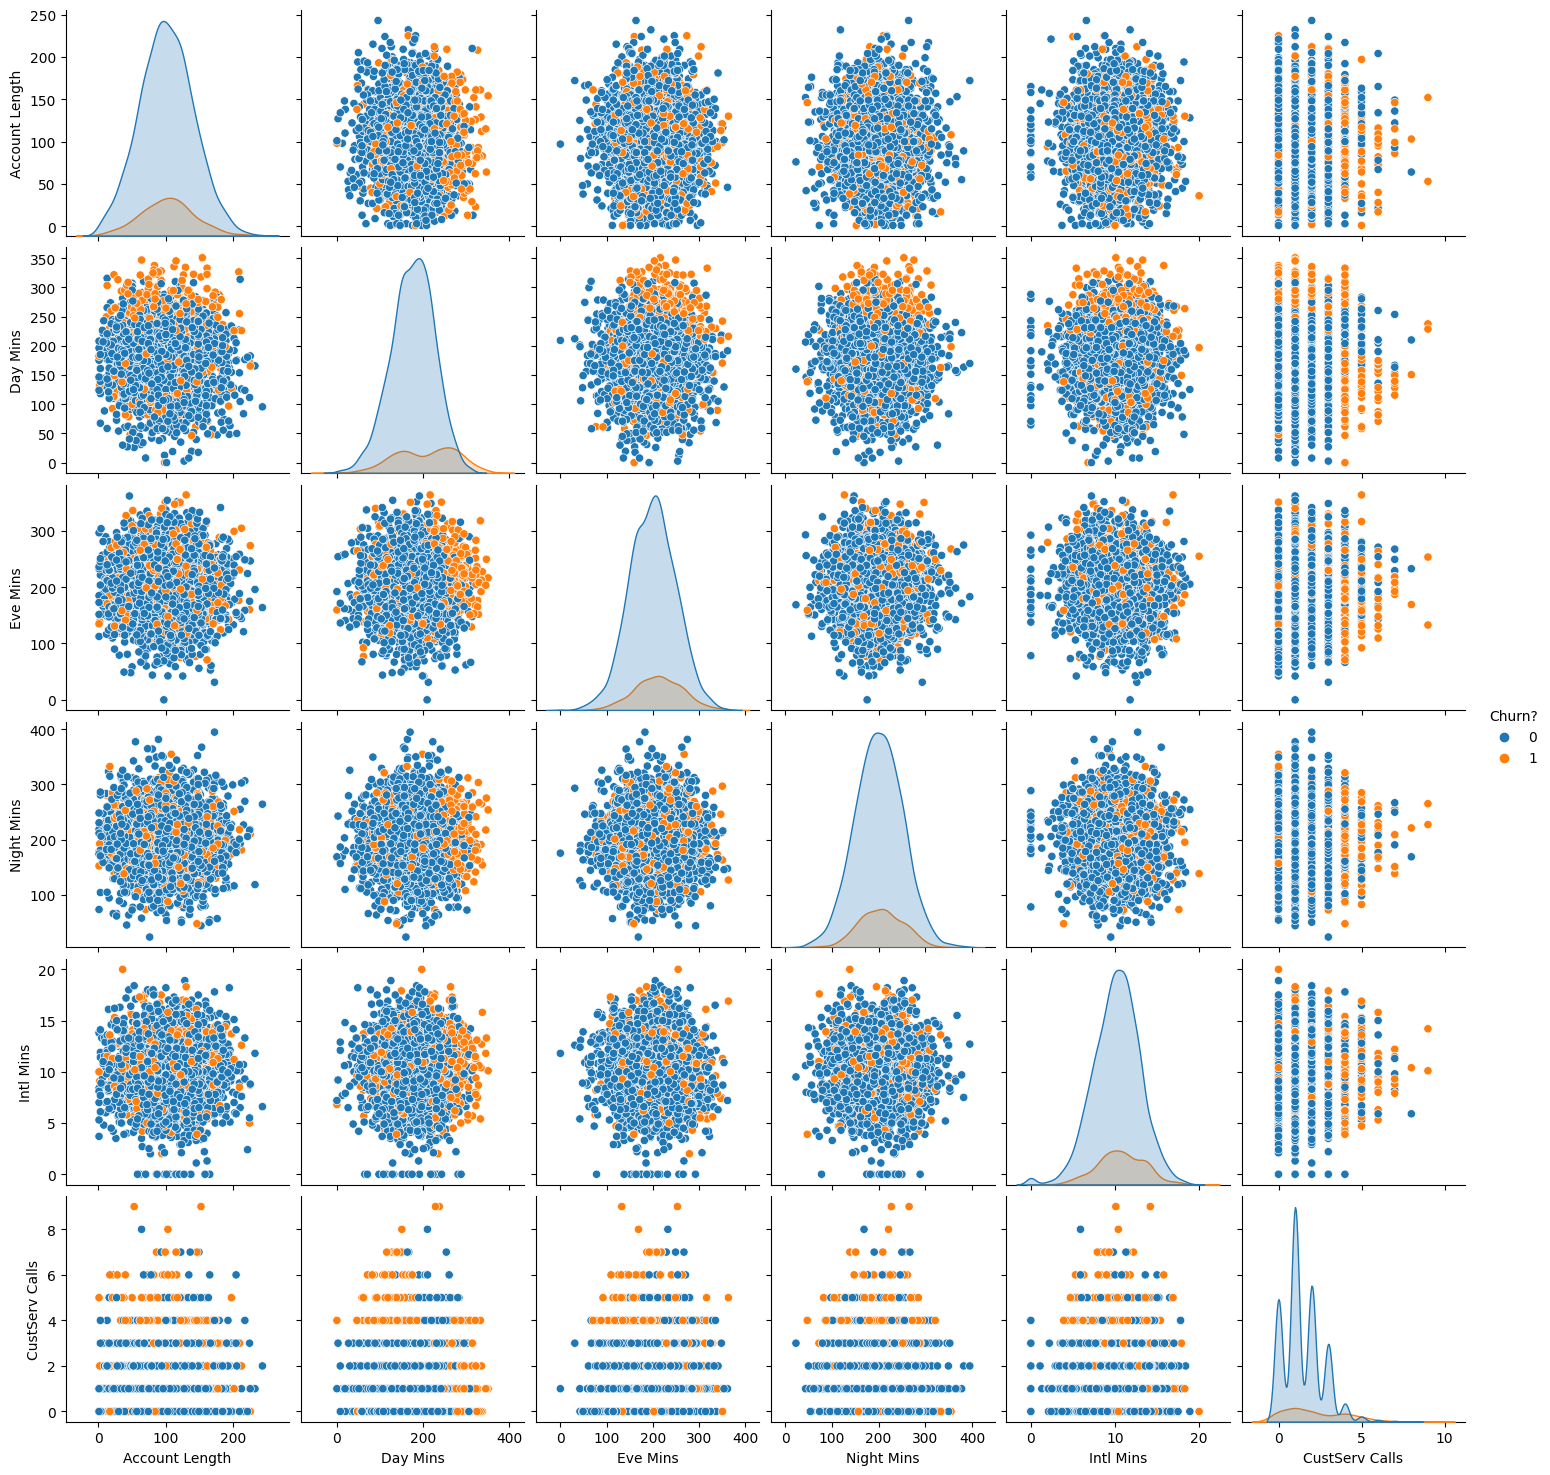

In [70]:
import seaborn as sns

attributes = ['Account Length', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Churn?']
sns.pairplot(churn[attributes], hue='Churn?')


## 다중공선성 문제와 feature 정제
---
변수 간 상관관계가 선형인 경우, 둘 중 하나만 택해야 한다. 다중공선성(multicollinearity) 문제가 발생할 수 있기 때문이다. 따라서 위 Scatter matrix를 통해 Day Mins-Charge, Eve Mins-Charge, Night Mins-Charge, Intl Mins-Charge 중 Charge 변수만 남기고 Mins 변수는 제거하여 feature를 정제하였다.

In [71]:
# 데이터 프레임에서 Day Mins, Eve Mins, Night Mins, Intl Mins 열 제거
churn = churn.drop('Day Mins', axis=1)
churn = churn.drop('Eve Mins', axis=1)
churn = churn.drop('Night Mins', axis=1)
churn = churn.drop('Intl Mins', axis=1)

In [72]:
features = list(churn.columns)
len(features) # 21 - 2 - 4

15

## Logistic Regression 모형 적합
---
- 정제된 데이터셋을 활용하여 로지스틱 회귀 모형을 적합한 결과는 다음과 같다.
- 이 때 Dataset은 `train(0.8)`, `test(0.2)`의 비율로 나누고 재 실행 시 동일한 결과값이 나오도록 random_state=42로 설정하였다.
- Dataset을 분리하고, 후진제거법을 통해 train set에 대해 logistic regression을 수행하며 recall score를 높이는 feature 5개를 뽑아내었다.
- 선택된 feature만을 사용해 train, testset을 재구성하였고, 모델 적합 및 예측을 수행하였다.

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Int'l Plan, VMail Plan 제외 나머지 feature에 대해 scaling 수행
scaler = MinMaxScaler()
churn_scaled = scaler.fit_transform(churn.drop(['Churn?', 'Int\'l Plan', 'VMail Plan'], axis=1))

# 데이터셋을 train set과 test set으로 분리
X_train, X_test, y_train, y_test = train_test_split(churn_scaled, churn['Churn?'], test_size=0.2, random_state=42)

# 후진 제거법을 통해 feature selection
logistic_regression = LogisticRegression()
sfs = SFS(logistic_regression,
          k_features=6,
          forward=False,
          floating=False,
          verbose=0,
          scoring='recall',
          cv=5)
sfs.fit(X_train, y_train)

selected_features = churn.columns[list(sfs.k_feature_idx_)]

# 선택된 피처만 사용하여 모델 학습을 위해 데이터셋을 재구성
X_train_selected = X_train[:, list(sfs.k_feature_idx_)]
X_test_selected = X_test[:, list(sfs.k_feature_idx_)]

# 모델 학습 및 성능 평가
model = LogisticRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
train_score = model.score(X_train_selected, y_train)
test_score = model.score(X_test_selected, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Selected Features:', selected_features)
print('Training Accuracy:', train_score)
print('Test Accuracy: ', test_score)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Selected Features: Index(['Int'l Plan', 'VMail Message', 'Day Charge', 'Eve Charge',
       'Night Charge', 'Intl Calls'],
      dtype='object')
Training Accuracy: 0.8589647411852963
Test Accuracy:  0.8530734632683659
Precision: 0.8
Recall: 0.039603960396039604
F1 score: 0.07547169811320754


In [89]:
print('Coefficients:', model.coef_.tolist()[0])

Coefficients: [-1.1313211545519732, 3.5105446459467347, 1.6586955411353097, 0.5365689105273413, 1.559735877409632, 3.487844889474443]


## 결과 분석
---
모델 성능을 표로 나타내 보면 다음과 같다.

|평가 지표          | value   |
|-----------------|---------|
|Training Accuracy| 0.85896 |
|Test Accuracy    | 0.85307 |
|Precision        | 0.8     |
|Recall           | 0.03960 | 
|F1 score         | 0.0754  |

위 결과에서 훈련, 테스트 데이터에 대한 예측 정확도는 약 85%로 비교적 단순한 모델임에 비해 높은 정확도를 보였다고 할 수 있다. 하지만 모델의 성능 지표 중 Recall에 집중해 볼 필요가 있다. Recall은 재현율로써, 실제 이탈한 고객 중 모델이 이탈로 예측한 고객 수 비율을 나타낸다. 이 값이 0.03960이라는 것은 곧 모델이 이탈할 것으로 예측한 고객이 실제로는 이탈하지 않았으며, 실제로 이탈한 고객 중 극히 일부만 잘 예측한 것으로 나타났다고 볼 수 있다. 따라서 본 데이터셋을 통해 이루고자 한 이탈 고객 예측 목적을 달성하기는 어려웠다고 볼 수 있다. F1 score를 확인해보면 0.0754로, 매우 낮게 나타났는데, precision과 recall의 조화평균으로 계산되기 때문에 매우 낮은 재현율로 낮은 f1 score값이 나타났다고 볼 수 있다. 
이러한 예측 문제를 해결하기 위해서는 고객이탈 데이터셋의 Churn 반응 변수의 True, False 비율을 균등하도록 데이터셋을 수집하거나, Class가 균형하도록 미리 dataset에서 sampling을 수행할 수 있다.

## Logistic Regression과 OLS 회귀분석
---
 OLS 회귀변수는 feature가 연속형인 경우에 사용된다. 하지만 로지스틱 회귀의 경우에는 각 변수들이 이항형인 경우가 많기 때문에 적합하지 않다. 일반적인 회귀모형에서 오차항의 등분산을 가정하는데, 로지스틱 회귀모형에서는 범주형인 종속변수를 갖기 때문에 등분산 가정이 성립되지 않는다. 따라서 OLS 추정량을 사용하지 않고, 로짓 함수를 사용하여 이를 활용해 변수의 값을 추정한다.